# Pandas

Pandas is a Python module used by data scientists to conduct data analysis.
It is great for cleaning data before it is processed for training.

In [13]:
# create a CSV file 
# use the Pandas module to analyze the CSV data

import csv

my_data = [['State','Flavor','Sales'],['CA','Raspberry',6],
           ['WA','Glazed',6],['WA','Chocolate',1],
           ['OR','Chocolate',1],['OR','Raspberry',1],
           ['CA','Apple',12],['WA','Chocolate',6],
           ['WA','Apple',12],['OR','Apple',12],
           ['OR','Glazed',6]]  
my_file = open('pandas_training.csv', 'w',newline='')
with my_file:  
    writer = csv.writer(my_file)
    writer.writerows(my_data)

See created file



In [14]:
!dir -l pandas_training.csv

 Volume in drive C is Windows10_OS
 Volume Serial Number is 24BE-6D53

 Directory of C:\Users\pwalsh


 Directory of C:\Users\pwalsh

04/29/2019  10:45 PM               165 pandas_training.csv
               1 File(s)            165 bytes
               0 Dir(s)  25,702,203,392 bytes free


Create data frames to view CSV

In [15]:
%matplotlib inline
import pandas as pd

In [16]:
dataframe = pd.read_csv('pandas_training.csv')

In [17]:
dataframe

,State,Flavor,Sales
0,CA,Raspberry,6
1,WA,Glazed,6
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Raspberry,1
5,CA,Apple,12
6,WA,Chocolate,6
7,WA,Apple,12
8,OR,Apple,12
9,OR,Glazed,6


See Top 5 Rows

In [18]:
dataframe.head()

,State,Flavor,Sales
0,CA,Raspberry,6
1,WA,Glazed,6
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Raspberry,1


Select Single Column

In [22]:
dataframe.Sales

0     6
1     6
2     1
3     1
4     1
5    12
6     6
7    12
8    12
9     6
Name: Sales, dtype: int64

Plotting Frequencies

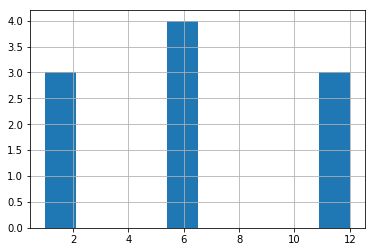

In [23]:
dataframe.Sales.hist()

Select Multiple Columns

In [24]:
dataframe[['State','Sales']]

,State,Sales
0,CA,6
1,WA,6
2,WA,1
3,OR,1
4,OR,1
5,CA,12
6,WA,6
7,WA,12
8,OR,12
9,OR,6


Select Rows

In [25]:
dataframe[dataframe.Sales == 1]

,State,Flavor,Sales
2,WA,Chocolate,1
3,OR,Chocolate,1
4,OR,Raspberry,1


Crosstab

In [26]:
pd.crosstab(dataframe.State, dataframe.Sales)

Sales,1,6,12
State,,,
CA,0,1,1
OR,2,1,1
WA,1,2,1


In [27]:
pd.crosstab(dataframe.State, dataframe.Flavor)

Flavor,Apple,Chocolate,Glazed,Raspberry
State,,,,
CA,1,0,0,1
OR,1,1,1,1
WA,1,2,1,0


Normalized Values

In [28]:
pd.crosstab(dataframe.State, dataframe.Flavor, dataframe.Sales, aggfunc=sum, margins=True)

Flavor,Apple,Chocolate,Glazed,Raspberry,All
State,,,,,
CA,12.0,NaN,NaN,6.0,18
OR,12.0,1.0,6.0,1.0,20
WA,12.0,7.0,6.0,NaN,25
All,36.0,8.0,12.0,7.0,63


Plot the Normalized chart

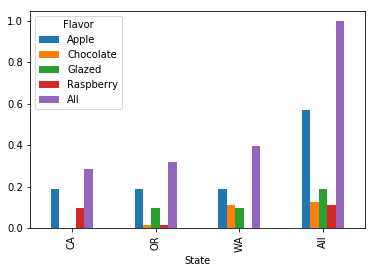

In [29]:
pd.crosstab(dataframe.State, dataframe.Flavor, dataframe.Sales, 
            aggfunc=sum, margins=True, normalize=True).plot(kind='bar')